# Testing basic ML algorithms in 2d 


Test of Logistic regression (LR) and of decision tree (DT) on a classification task with two variables, and a well defined separation line on the 2-d plane.   

### Performance verification :
    
* Look at evolution of loss as a function of the epoch for training and validation samples (only for LR)
* Plot distribution of output probability for signal and background
* Plot ROC
* For relevant variables compare distribution for events with probability<0.5 and events with probability<0.5
* Write out the optimised weights to nderstand the relative importance of variables (LR)
* Draw the final tree (DT)

In [1]:
import math # for mathematical functions such as square root
import numpy as np # for numerical calculations such as histogramming
import matplotlib.pyplot as plt
import pandas as pd

# Generate pattern in 2-d space

Divide a 2-d space in two regions based on a function of the two variables, 
and populate the two regions with randomly distributed points 

In [2]:
# define how many events you want
n=10000
# generate random inputs in [-0.5, 0.5]
X1 = np.random.random(n)-0.5
X2 = np.random.random(n)-0.5
# Define partition of space as a boolean function of the two variables
Y = X1*0.2+X2*0.3<0
# Y=((X1<0) & (X2<0)) | ((X1>0.25) & (X2>0.25))
#Y=((X1<-0.33) & (X2<0)) | ((X1>0.28) & (X2>0.40))
#Y=X1*X1*0.3-X2*0.2>0
#Y=X1*X1*0.3-X2*0.2>0
# stacking requires vectors to be defined as 2-d vector with
# second dimension=1
X1 = X1.reshape(n, 1)
X2 = X2.reshape(n, 1)
Y = Y.reshape(n, 1)
# print(X1)
# print(X2)
# print(Y)
data= np.hstack((X1, X2, Y))
# print(data)
df = pd.DataFrame(data,columns=['x1', 'x2','SIG'])

Visualise generated patterns in 2-d parameter space

In [3]:
def plot_scat(df, sel1, sel2, var1, var2, blx, bhx, bly, bhy):
  df_pass = df.query(sel1)
  df_nopass = df.query(sel2)
  fig= plt.figure(figsize=(14,5))
  plt.subplot(1, 2,1)
  plt.xlim([blx,bhx])
  plt.ylim([bly,bhy])
  
  plt.plot(np.asarray(df_nopass[var1]), np.asarray(df_nopass[var2]), 'bo', alpha=0.4, label=sel2)
  plt.legend(loc='best')
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.subplot(1, 2,2)
  plt.xlim([blx,bhx])
  plt.ylim([blx,bhx])
  plt.plot(np.asarray(df_pass[var1]), np.asarray(df_pass[var2]), 'ro', alpha=0.4, label=sel1)
  plt.legend(loc='best')
  plt.xlabel(var1)
  plt.ylabel(var2)
  plt.show()

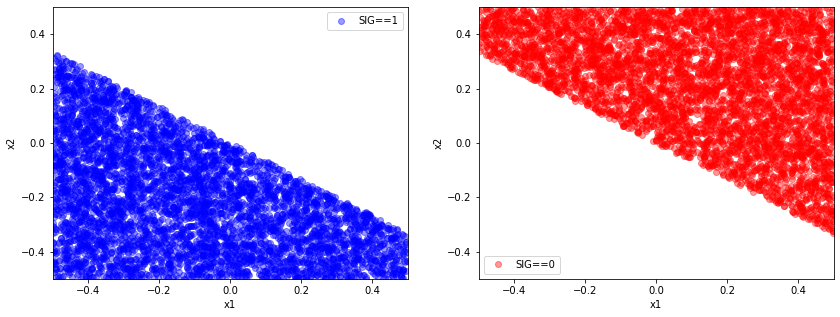

In [4]:
# now plot the covered area for the two 

sel1='SIG==0'
sel2='SIG==1'
plot_scat(df, sel1, sel2, 'x1', 'x2', -0.5, 0.5, -0.5, 0.5)

## Split train test and validation with sklearn

In [5]:
from sklearn.model_selection import train_test_split
#Define vectors for input to ML
# Use 'SIG' column as definition of target
y = df['SIG']
# define dataframe out of all columns except the "SIG" one
X = df[[col for col in df.columns if col!="SIG"]]
col_fin=X.columns
X_tv, X_test, y_tv, y_test = train_test_split(X, y,
                                   test_size=.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_tv, y_tv,
                                   test_size=.10, random_state=0)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Logistic regression

Implement in Keras and run

In [6]:
import tensorflow
print(tensorflow.__version__)
from tensorflow import keras
#from keras.utils import plot_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import warnings

varnum=X_train.shape[1]
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_dim=varnum, activation='sigmoid'))
model.summary()

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history=model.fit(X_train, y_train, 
                  validation_data=(X_val,y_val), 
                  batch_size=100, epochs=100)

2024-04-30 13:30:05.406004: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-30 13:30:05.407713: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-30 13:30:05.433125: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 13:30:05.433149: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 13:30:05.433174: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

2.14.0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
68/68 [==============================] - 0s 3ms/step - loss: 0.8044 - accuracy: 0.1655 - val_loss: 0.7957 - val_accuracy: 0.1800
Epoch 2/100
68/68 [==============================] - 0s 935us/step - loss: 0.7916 - accuracy: 0.1751 - val_loss: 0.7831 - val_accuracy: 0.1907
Epoch 3/100
68/68 [==============================] - 0s 941us/step - loss: 0.7792 - accuracy: 0.1895 - val_loss: 0.7709 - val_accuracy: 0.2013
Epoch 4/100
68/68 [==============================] - 0s 1ms/step - loss: 0.7671 - accuracy: 0.2058 - val_loss: 0.7590 

68/68 [==============================] - 0s 1ms/step - loss: 0.4413 - accuracy: 0.9896 - val_loss: 0.4384 - val_accuracy: 0.9907
Epoch 55/100
68/68 [==============================] - 0s 898us/step - loss: 0.4380 - accuracy: 0.9890 - val_loss: 0.4352 - val_accuracy: 0.9907
Epoch 56/100
68/68 [==============================] - 0s 896us/step - loss: 0.4348 - accuracy: 0.9884 - val_loss: 0.4320 - val_accuracy: 0.9893
Epoch 57/100
68/68 [==============================] - 0s 865us/step - loss: 0.4317 - accuracy: 0.9877 - val_loss: 0.4289 - val_accuracy: 0.9893
Epoch 58/100
68/68 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.9865 - val_loss: 0.4259 - val_accuracy: 0.9893
Epoch 59/100
68/68 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.9861 - val_loss: 0.4229 - val_accuracy: 0.9893
Epoch 60/100
68/68 [==============================] - 0s 890us/step - loss: 0.4226 - accuracy: 0.9858 - val_loss: 0.4200 - val_accuracy: 0.9893
Epoch 61/10

## Run prediction

In [7]:
Ypredr=model.predict(X_test)

79/79 [==============================] - 0s 698us/step


## Create dataframe with labels and probabilities 

In [8]:
df_test_acc_r=X_test.copy()
df_test_acc_r['SIG']=y_test
df_test_acc_r['PROB']=Ypredr

# Look at the classification performance

## Plot history of losses along epochs for Keras

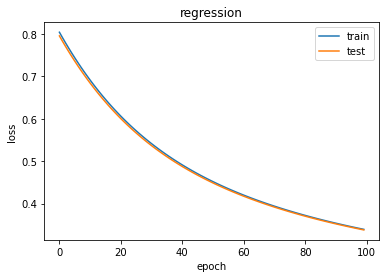

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('regression')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Plot distribution of output probabilities  for signal and backround

The output of the classification is for each event a number between 0 and 1 representing the probability that that event is a signal event. Since for each event we know whether it was a signal (SIG=1) or a background (SIG=0), we can plot the output probability of the network for each of the two classes.


nsig  1280
nbkg  1220


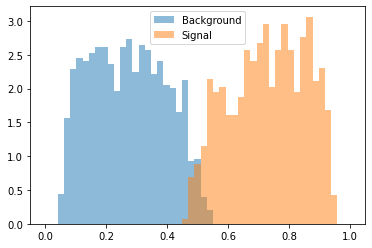

In [10]:
# split according to the label
df_test_acc_r_bkg = df_test_acc_r.query('SIG==0')
df_test_acc_r_sig = df_test_acc_r.query('SIG==1')
print('nsig ',df_test_acc_r_sig.shape[0])
print('nbkg ',df_test_acc_r_bkg.shape[0])
bins = np.linspace(0, 1,50)
plt.hist(df_test_acc_r_bkg.PROB, bins, alpha=0.5, density=True, label='Background')
plt.hist(df_test_acc_r_sig.PROB, bins, alpha=0.5, density=True, label='Signal')
plt.legend(loc='best')
plt.show()

## Plot ROC curve and calculate AUC
In order to perform our the final selection we put a lower limit on the value of the probability and we count the fraction of events above this limit for both signal and backround, i.e for each value of PROB we have two values: The 'true positive rate (TPR)' (efficiency of signal selection in HEP language), and 'false positive rate (FPR)' (efficency for selecting background). If we TPR versus FPR the other as a function of PROB we obtain a curve called the Receive Operating Characteristic (ROC) curve https://en.wikipedia.org/wiki/Receiver_operating_characteristic. Methods for building the ROC curve are availabel in sklearn.metrics. An ideal ROC curve would be along upper x and left y axes of the plot, corresponding to the case where all of the signal events have PROB=1 and all background events have PROB=0. The worst case is a curve where TPR=FPR, i.e. the discrimination power is the same as extracting a random number for PROB.

Regression auc  0.9987423155737706


<function matplotlib.pyplot.show(close=None, block=None)>

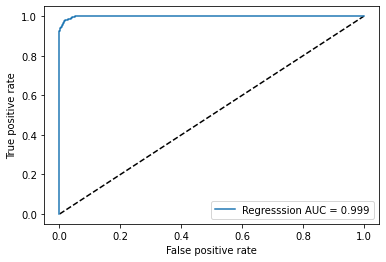

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

plt.plot([0.001, 1], [0, 1], 'k--')
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, Ypredr)
auc_keras = auc(fpr_keras, tpr_keras)
print("Regression auc ",auc_keras)
plt.plot(fpr_keras, tpr_keras, label='Regresssion AUC = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show    


## Visualise patterns in 2-d space

SIG==0 SIG==1


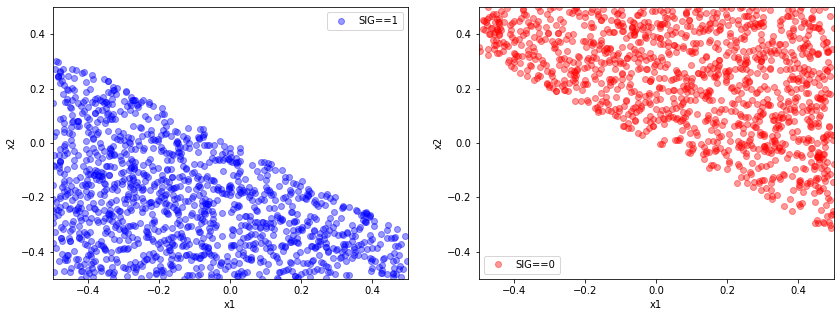

PROB<0.5 PROB>0.5


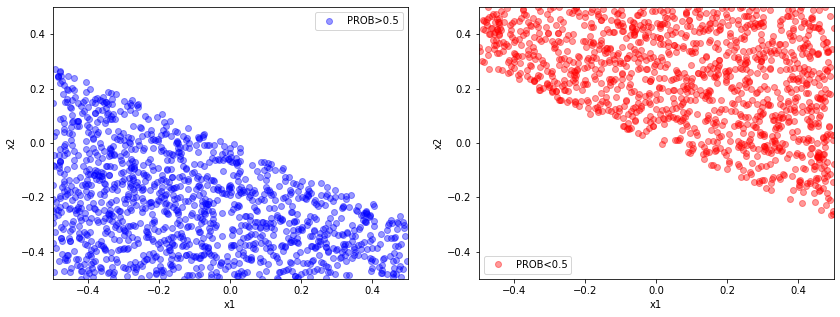

In [12]:
sel1='SIG==0'
sel2='SIG==1'
print(sel1,sel2)
plot_scat(df_test_acc_r, sel1, sel2, 'x1', 'x2', -0.5, 0.5, -0.5, 0.5)
thrmax=0.5
sel1='PROB<'+str(thrmax)
sel2='PROB>'+str(thrmax)
print(sel1,sel2)
plot_scat(df_test_acc_r, sel1, sel2, 'x1', 'x2', -0.5, 0.5, -0.5, 0.5)

## Compare label and prediction in 1-d projections

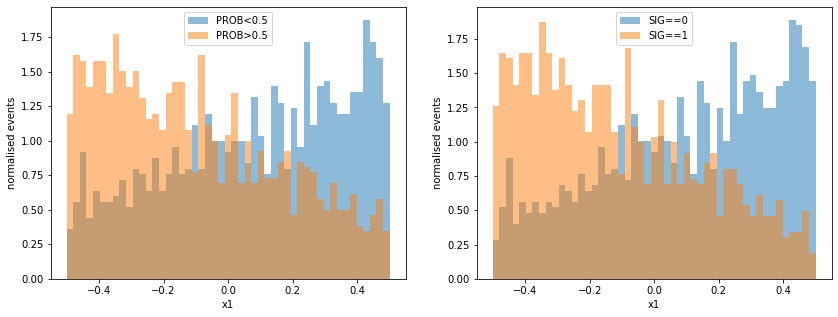

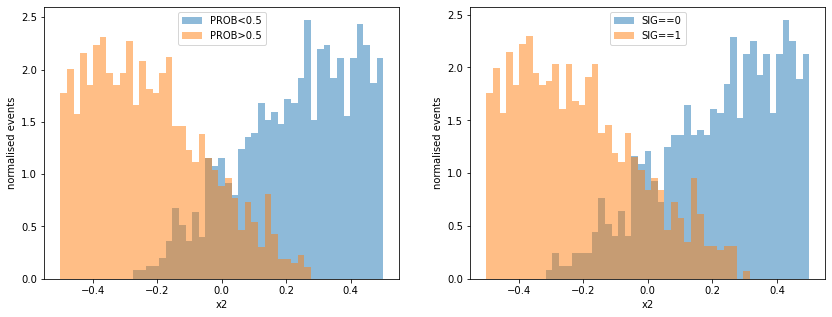

In [13]:
pred_false='PROB<0.5'
pred_true='PROB>0.5'
lab_false='SIG==0'
lab_true='SIG==1'
nbin=50
blow=-0.5
bhigh=0.5
bins = np.linspace(blow, bhigh, nbin)
fig1= plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)
var="x1"
plt.hist(df_test_acc_r.query(pred_false)[var], bins, alpha=0.5, density=True, label=pred_false)
plt.hist(df_test_acc_r.query(pred_true)[var], bins, alpha=0.5, density=True, label=pred_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.subplot(1, 2,2)
plt.hist(df_test_acc_r.query(lab_false)[var], bins, alpha=0.5, density=True, label=lab_false)
plt.hist(df_test_acc_r.query(lab_true)[var], bins, alpha=0.5, density=True, label=lab_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.show()
fig2= plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)
var="x2"
plt.hist(df_test_acc_r.query(pred_false)[var], bins, alpha=0.5, density=True, label=pred_false)
plt.hist(df_test_acc_r.query(pred_true)[var], bins, alpha=0.5, density=True, label=pred_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.subplot(1, 2,2)
plt.hist(df_test_acc_r.query(lab_false)[var], bins, alpha=0.5, density=True, label=lab_false)
plt.hist(df_test_acc_r.query(lab_true)[var], bins, alpha=0.5, density=True, label=lab_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.show()

## Visualise weights

In [14]:
layer_weights = model.layers[0].get_weights()[0]
layer_biases  = model.layers[0].get_weights()[1]
print('layer weights',layer_weights)
print('layer biases',layer_biases)

layer weights [[-2.1982436]
 [-3.9130182]]
layer biases [0.00861919]


# Decision tree classifier

Documentation for the possible options is in <br />

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

test_tree = pd.DataFrame(X_test)
test_tree.columns=col_fin


clf = DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini', splitter='best', random_state=0)
clf.fit(X_train, y_train)

Ypredt=clf.predict_proba(test_tree)

print('Training finished')

Training finished


In [16]:
print(Ypredt.shape)
df_test_acc_t=X_test.copy()
df_test_acc_t['SIG']=y_test
df_test_acc_t['PROB']=Ypredt[:,1]

(2500, 2)


## Plot distribution of output probabilities  for signal and backround

nsig  1280
nbkg  1220


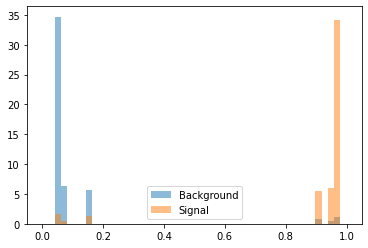

In [17]:
# split according to the label
df_test_acc_t_bkg = df_test_acc_t.query('SIG==0')
df_test_acc_t_sig = df_test_acc_t.query('SIG==1')
print('nsig ',df_test_acc_t_sig.shape[0])
print('nbkg ',df_test_acc_t_bkg.shape[0])
bins = np.linspace(0, 1,50)
plt.hist(df_test_acc_t_bkg.PROB, bins, alpha=0.5, density=True, label='Background')
plt.hist(df_test_acc_t_sig.PROB, bins, alpha=0.5, density=True, label='Signal')
plt.legend(loc='best')
plt.show()

## Plot ROC curve and calculate AUC

Regression auc  0.958175268954918


<function matplotlib.pyplot.show(close=None, block=None)>

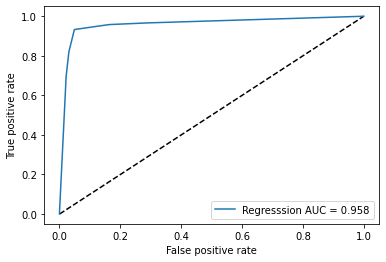

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

plt.plot([0.001, 1], [0, 1], 'k--')
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, Ypredt[:,1])
auc_keras = auc(fpr_keras, tpr_keras)
print("Regression auc ",auc_keras)
plt.plot(fpr_keras, tpr_keras, label='Regresssion AUC = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')
plt.show    


## Visualise patterns in 2-d space

SIG==0 SIG==1


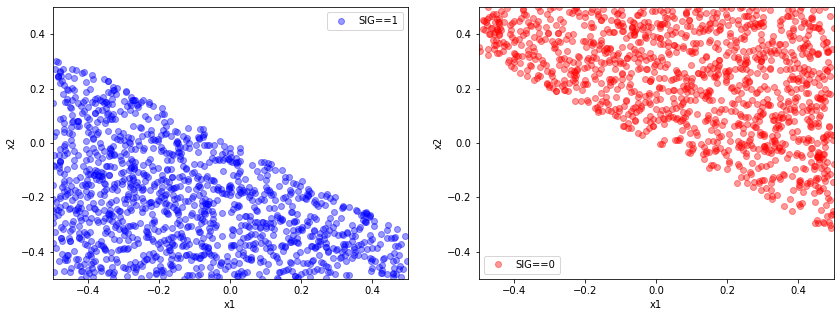

PROB<0.5 PROB>0.5


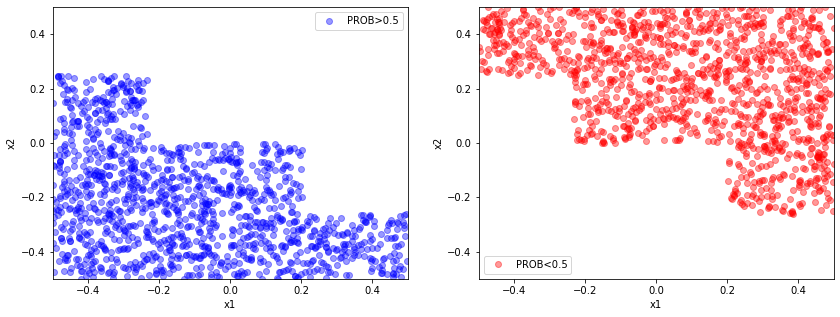

In [19]:
sel1='SIG==0'
sel2='SIG==1'
print(sel1,sel2)
plot_scat(df_test_acc_t, sel1, sel2, 'x1', 'x2', -0.5, 0.5, -0.5, 0.5)
thrmax=0.5
sel1='PROB<'+str(thrmax)
sel2='PROB>'+str(thrmax)
print(sel1,sel2)
plot_scat(df_test_acc_t, sel1, sel2, 'x1', 'x2', -0.5, 0.5, -0.5, 0.5)

## Compare label and prediction in 1-d projections

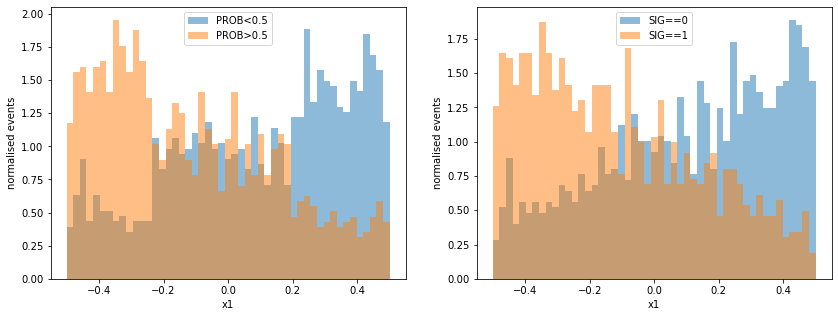

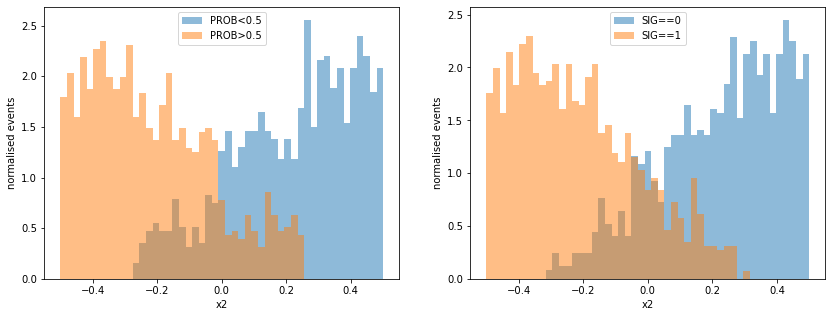

In [20]:
pred_false='PROB<0.5'
pred_true='PROB>0.5'
lab_false='SIG==0'
lab_true='SIG==1'
nbin=50
blow=-0.5
bhigh=0.5
bins = np.linspace(blow, bhigh, nbin)
fig1= plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)
var="x1"
plt.hist(df_test_acc_t.query(pred_false)[var], bins, alpha=0.5, density=True, label=pred_false)
plt.hist(df_test_acc_t.query(pred_true)[var], bins, alpha=0.5, density=True, label=pred_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.subplot(1, 2,2)
plt.hist(df_test_acc_t.query(lab_false)[var], bins, alpha=0.5, density=True, label=lab_false)
plt.hist(df_test_acc_t.query(lab_true)[var], bins, alpha=0.5, density=True, label=lab_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.show()
fig2= plt.figure(figsize=(14,5))
plt.subplot(1, 2,1)
var="x2"
plt.hist(df_test_acc_t.query(pred_false)[var], bins, alpha=0.5, density=True, label=pred_false)
plt.hist(df_test_acc_t.query(pred_true)[var], bins, alpha=0.5, density=True, label=pred_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.subplot(1, 2,2)
plt.hist(df_test_acc_t.query(lab_false)[var], bins, alpha=0.5, density=True, label=lab_false)
plt.hist(df_test_acc_t.query(lab_true)[var], bins, alpha=0.5, density=True, label=lab_true)
plt.legend(loc='best')
plt.xlabel(var)
plt.ylabel('normalised events')
plt.show()

## Visualize tree

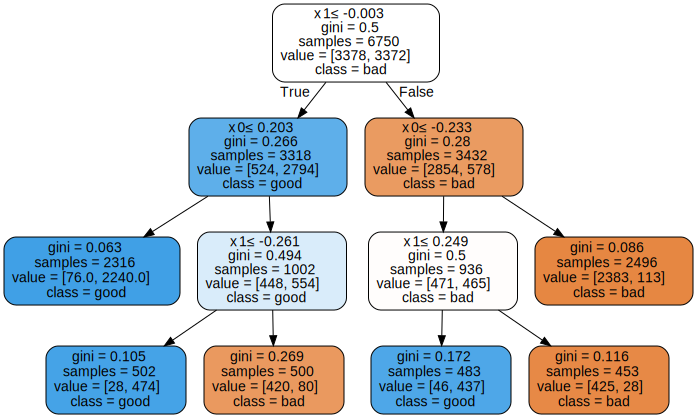

In [21]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
dot_data = tree.export_graphviz(clf, out_file=None,
                     class_names=["bad","good"],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph

# Exercises

* Uncomment and try different patterns in generation and look how the algorithms performs in different cases
* Study dependence of performance from number of events
* Study dependence of performance of regression from choice of optimizer number of epoch, size of batches
* Study dependence of performance of decision tree from number of leaves/loss criterion
* Extend generation to three variables, and test the algorithms